# Notebook for SCENARIO == 2 or SCENARIO == 3.

In [1]:
import sys
import plotly.express as px
import pandas as pd
import numpy as np

sys.path.append('..')

from model.run import df

In [2]:
pd.set_option('display.precision', 3)
height_solo = 600

In [3]:
df1 = df.copy(deep=True)
df1 = df1.loc[(df1['substep'] == max(df1['substep']))]
df1 = df1.groupby(['run', 'subset', 'timestep']).last().reset_index()

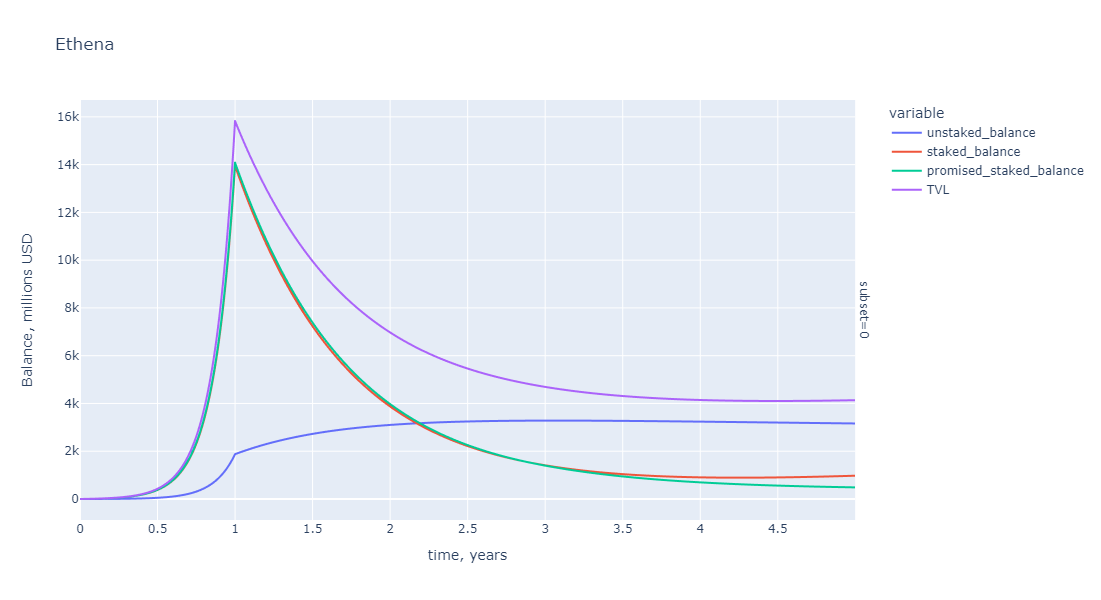

In [4]:
df2 = df1.loc[(df1['run'] == 1)]
fig = px.line(df2, x='curr_time', y= ['unstaked_balance', 'staked_balance', 'promised_staked_balance', 'TVL'], 
              title="Ethena", facet_row='subset', height=height_solo)

fig.update_layout(
    xaxis_title='time, years',
    yaxis_title='Balance, millions USD',
)

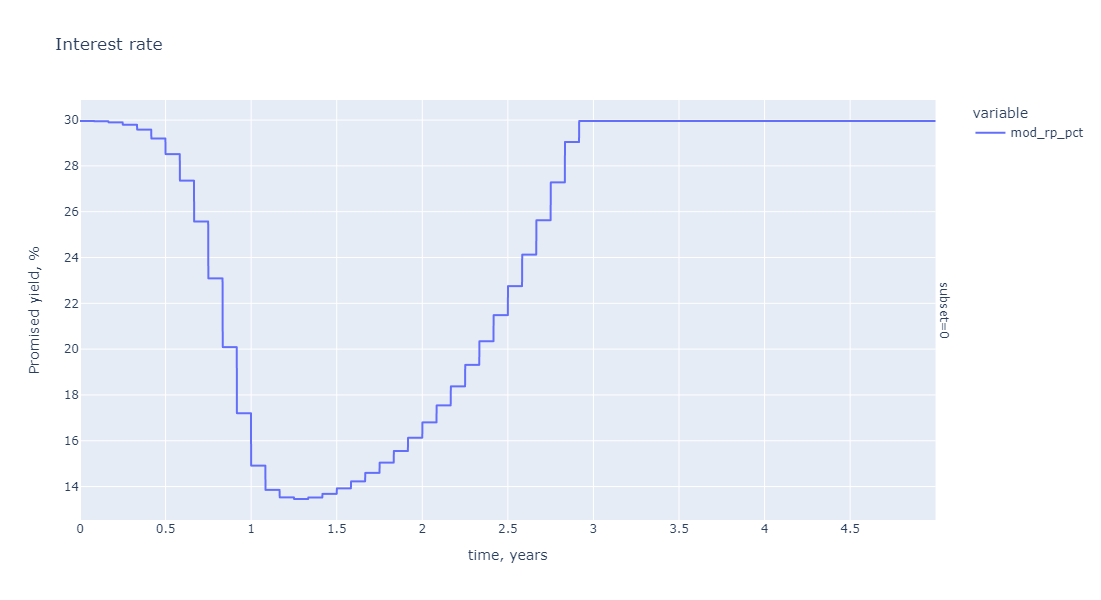

In [5]:
df2['mod_rp_pct'] = 100. * (np.exp(df2['mod_rp']) - 1)
fig = px.line(df2, x='curr_time', y=['mod_rp_pct'], title="Interest rate", facet_row='subset', height=height_solo)

fig.update_layout(
    xaxis_title='time, years',
    yaxis_title='Promised yield, %',
)